<a href="https://colab.research.google.com/github/hungpham13/Distributed-data-discretization/blob/main/Data-preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/hungpham13/Distributed-data-discretization
# %cd Distributed-data-discretization/
# !pip install -r requirements.txt

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Generating exponential distribution, 36 days, 1000 samples...


100%|██████████| 35/35 [00:02<00:00, 17.17it/s]


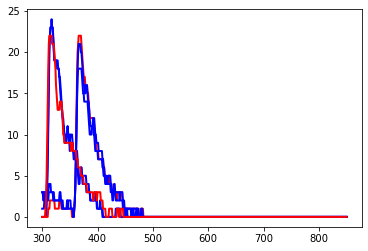

[[0 0 0 ... 0 0 0]
 [1 1 5 ... 0 0 0]
 [0 0 1 ... 0 0 1]
 [5 3 2 ... 0 0 0]
 [5 3 2 ... 0 0 0]]


In [2]:
from data_generation.gen_data import generate_data
data = generate_data(36, 1000, 'exponential', visualize=True)
# nums_sam = [1000, 3000, 10000, 30000, 100000, 300000, 1000000]
# nums_day = [30, 60, 120, 365, 365*2, 365*3]
# dists = ['exponential']

# for dist in dists:
#     for num_samples in nums_sam:
#         for num_days in nums_day:
#             data = generate_data(num_days, num_samples, dist, visualize=False)

In [3]:
import numpy as np
data[0, :-1]
print(np.max(data[:,:-1]), np.max(data[:,:-1]) <= 850)
print(np.min(data[:, :-1]), np.min(data[:, :-1]) >=300)

37 True
0 False


In [4]:
from model.psi import get_breakpoint 
from model.psi import calculate_psi

breakpoints = get_breakpoint(data[:,:-1].reshape(-1), buckettype='bins', buckets=10)
print(breakpoints)
for i in range(len(data) - 1):
    psi = calculate_psi(expected=data[i, :-1], actual=data[i + 1, :-1],
                        breakpoints=breakpoints)
    if (data[i + 1, -1] == 0 and psi > 0.1):
        print(psi)

[ 0.   3.7  7.4 11.1 14.8 18.5 22.2 25.9 29.6 33.3 37. ]


In [5]:
import numpy as np
x = [1,2,2,1,3,4,5]
hist, _ = np.histogram(x, bins=np.arange(1, 7, 1))
hist.tolist()

[2, 2, 1, 1, 1]

/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/dungnasa/anaconda3/envs/LearnML/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:>

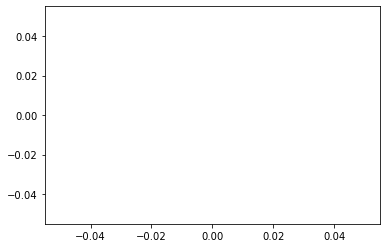

In [6]:
import seaborn as sns
sns.lineplot([1,2,8,3,1])